# Visualization in Python

One of the best ways to improve your data visualization skills is to try and replicate great visualizations you see out there. In this live code-along, we will take a look at how to recreate some amazing visualizations using Python so that you can take your data visualization skills to the next level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

## ⚾ Strikeouts in Baseball

The first visualization we will try and replicate is a sports piece published by the New York Times in 2012. It is a beautiful visualization illustrating how strikeouts were on the rise. The visualization showcases the strikeouts per game by team as well as the aggregated strikeouts per game for the whole league. Read the [original article](https://archive.nytimes.com/www.nytimes.com/interactive/2013/03/29/sports/baseball/Strikeouts-Are-Still-Soaring.html?ref=baseball) to get more context, and analyze the visualization carefully before attempting to replicate it.

![viz-baseball-strikeouts](viz-baseball-strikeouts.png)

The data for this visualization comes from an [excellent database](http://www.seanlahman.com/baseball-archive/statistics/) compiled by Sean Lahman that contains complete batting and pitching statistics from 1871 to 2020, plus fielding statistics, standings, team stats, managerial records, post-season data, and more.

In [2]:
teams = pd.read_csv('teams.csv')[['yearID', 'franchID', 'name', 'G', 'SO']] 
teams.head()

,yearID,franchID,name,G,SO
0,1871,BNA,Boston Red Stockings,31,19.0
1,1871,CNA,Chicago White Stockings,28,22.0
2,1871,CFC,Cleveland Forest Citys,29,25.0
3,1871,KEK,Fort Wayne Kekiongas,19,9.0
4,1871,NNA,New York Mutuals,33,15.0


In [3]:
teams['SOG'] = teams['SO'] / teams['G']

In [4]:
# Team level SOG
team_sog = (
    teams
        .query('yearID >= 1900')
        .assign(SOG = lambda d: d.SO / d.G)
)

red_sox_sog = (
    team_sog
        .query('name == "Boston Red Sox"')
)

league_sog = (
    team_sog
        .groupby('yearID', as_index=False)
        .agg(SOG_avg = ('SOG','mean') )
)

league_sog.head()

,yearID,SOG_avg
0,1900,2.358187
1,1901,3.136925
2,1902,2.966822
3,1903,3.546596
4,1904,3.725953


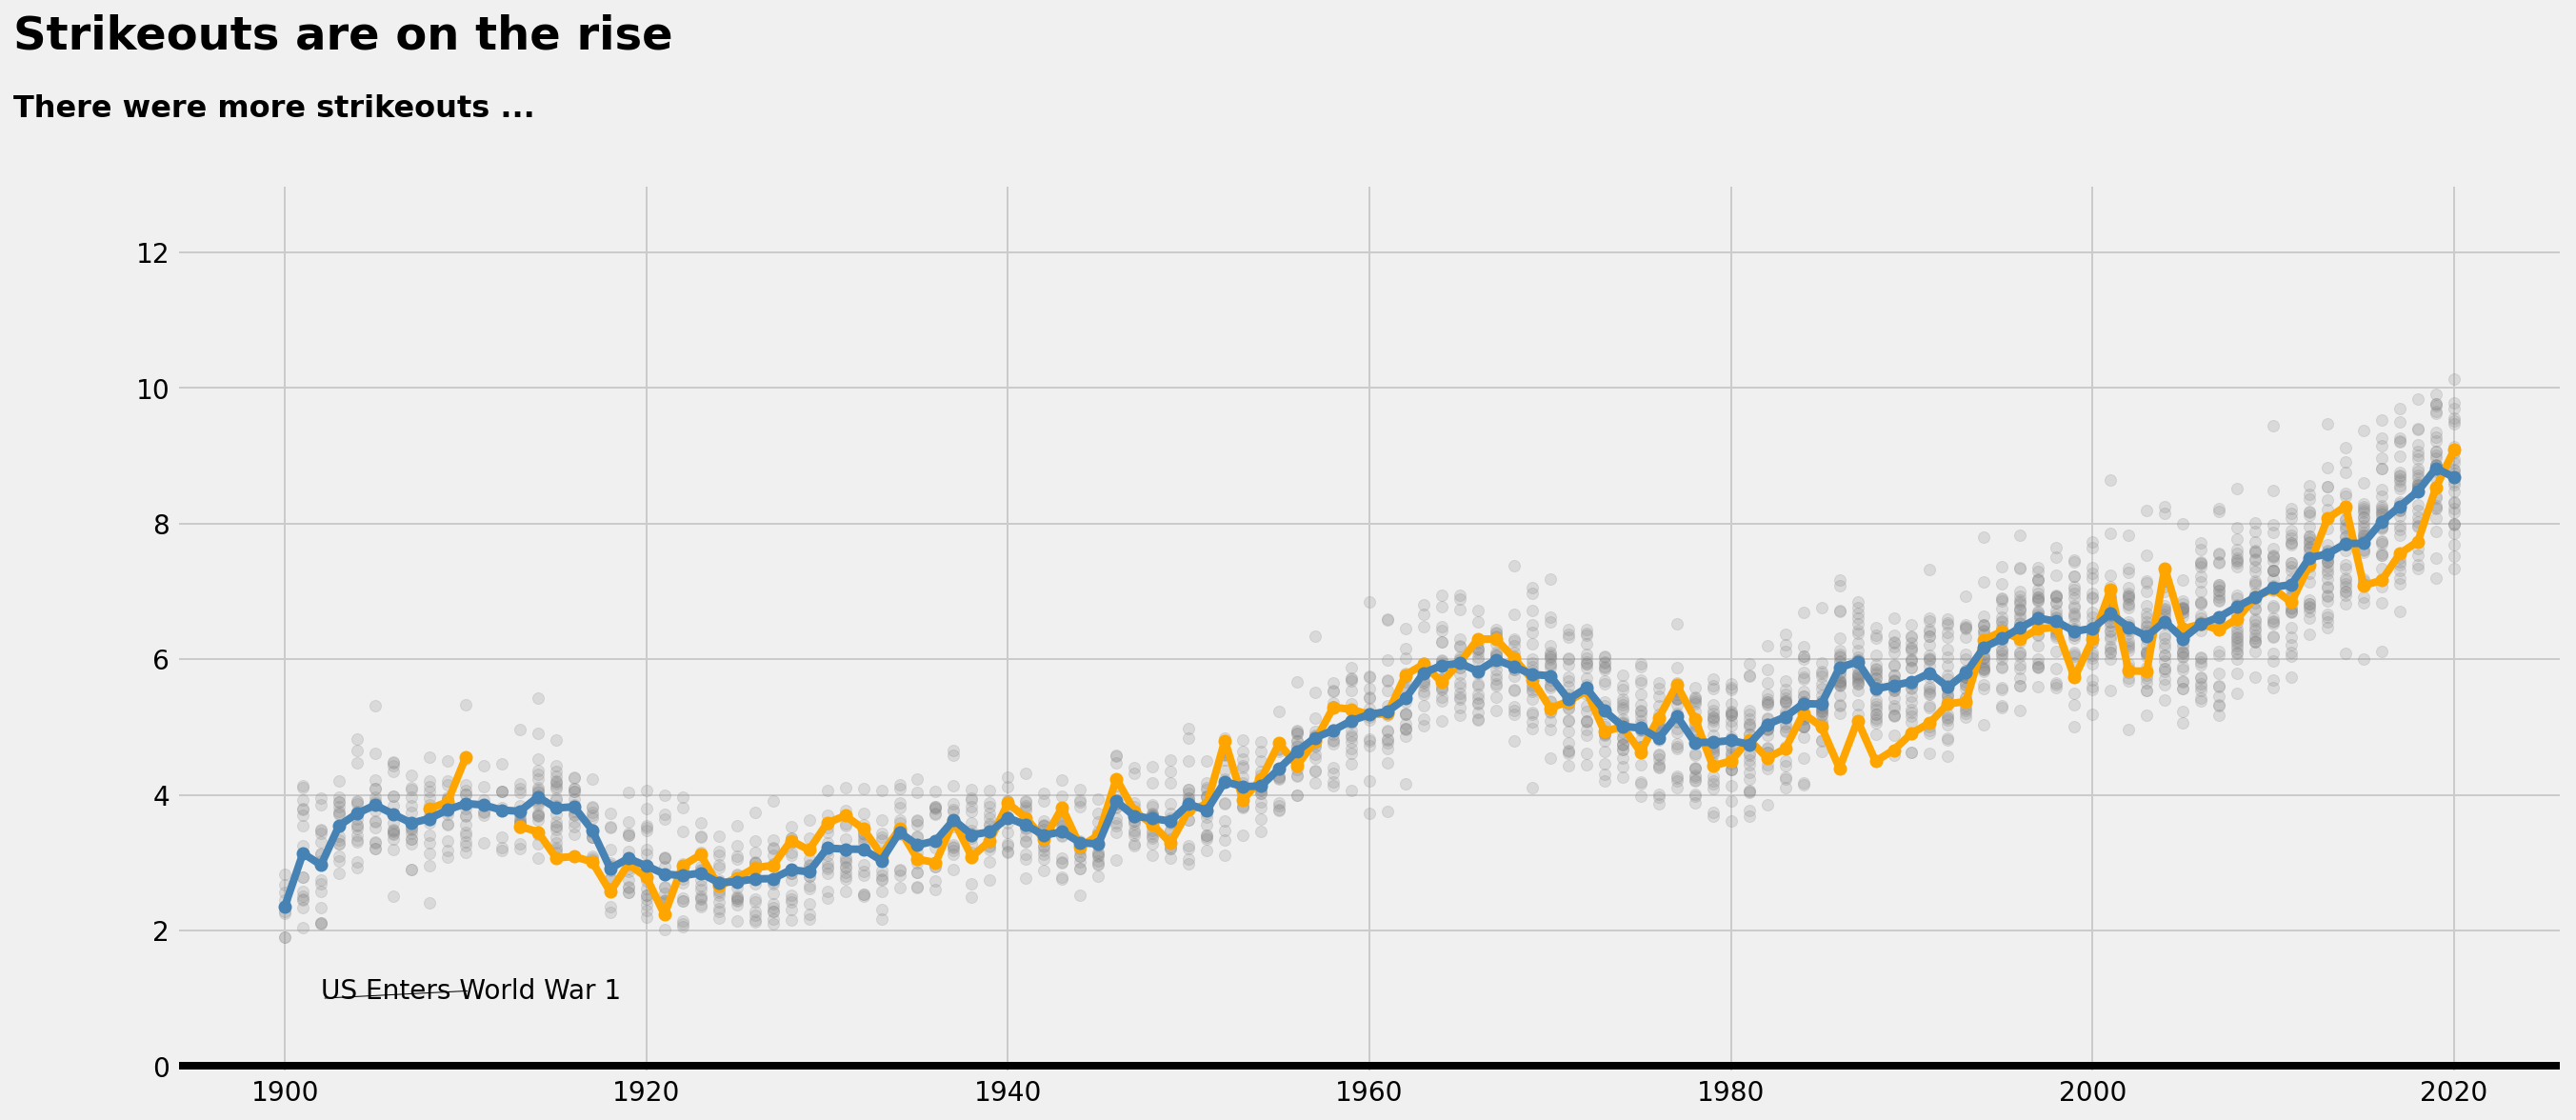

In [7]:
# Plot data
# Plot setup
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('fivethirtyeight')

# Add scatter plot layer for all SOGs
plt.scatter (

    team_sog['yearID'],
    team_sog['SOG'],
    color= 'grey',
    alpha=0.2
)



# Add a line plot layer for a specific team (Boston Red Sox, Orange line)
plt.plot(
    red_sox_sog['yearID'],
    red_sox_sog['SOG'],
    color = 'orange',
    marker = 'o'
)

# Add line plot for entire league (Blue line)
plt.plot(
    league_sog['yearID'],
    league_sog['SOG_avg'],
    color = 'steelblue',
    marker = 'o'
)

# Change axis limits
plt.ylim(-0.1, 13)
plt.axhline(xmin=0, color='black')

# Add text annotation layer
plt.annotate(
    'US Enters World War 1',
    xy = (1902,1), 
    arrowprops = dict(
        color='black',
        arrowstyle = '-'
    )
)


# Add title,  subtitle etc.
plt.text(1885, 15, s='Strikeouts are on the rise', fontsize=24, fontweight='bold')
plt.text(1885, 14, s='There were more strikeouts ...', fontsize=16, fontweight='bold')
plt.show()

## 🦠 COVID Cases by State

The second visualization we will try and replicate is also from the New York Times and was published on March 21st 2020 to visualize the spread of COVID by state. Read the [original article](https://www.nytimes.com/interactive/2020/03/21/us/coronavirus-us-cases-spread.html) to get a better understanding.

![viz-covid-by-state.png](viz-covid-by-state.png)

You will need two datasets to replicate this plot. The first dataset is provided by the New York Times and provides a time series of COVID cases by date. The second dataset provides a useful mapping of states to x-y coordinates on the grid. Use it wisely to place the different panels appropriately.

In [10]:
# COVID Cases by State
# covid_cases = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_cases = pd.read_csv('covid_cases.csv')
covid_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [11]:
# Grid Coordinates for States
# Source: https://github.com/hrbrmstr/statebins/blob/master/R/aaa.R
state_coords = pd.read_csv('state_coords.csv')
state_coords.head()

,abbrev,state,x,y
0,AL,Alabama,8,7
1,AK,Alaska,1,7
2,AZ,Arizona,3,6
3,AR,Arkansas,6,6
4,CA,California,2,5


In [16]:
state_coords.to_dict(orient='records')[:5]

[{'abbrev': 'AL', 'state': 'Alabama', 'x': 8, 'y': 7},
 {'abbrev': 'AK', 'state': 'Alaska', 'x': 1, 'y': 7},
 {'abbrev': 'AZ', 'state': 'Arizona', 'x': 3, 'y': 6},
 {'abbrev': 'AR', 'state': 'Arkansas', 'x': 6, 'y': 6},
 {'abbrev': 'CA', 'state': 'California', 'x': 2, 'y': 5}]

Text(0.5, 0.98, 'Number of New Cases Each Day')

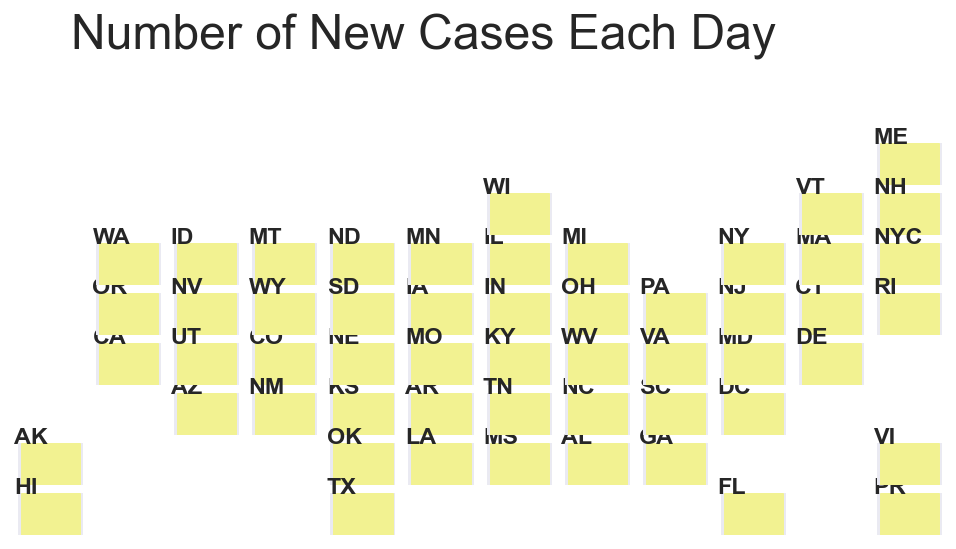

In [33]:
# Plot setup
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = (30, 30)
plt.style.use('seaborn')
fig = plt.figure()

# Define a grid object
gs = fig.add_gridspec(nrows=13, ncols=13)

# Plot lines for each state
for state in state_coords.to_dict(orient='records'):
    ax = fig.add_subplot(gs[state['y'], state['x']])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    state_name = state['state']
    d = (
        covid_cases
            .query('state == "@state_name"')
    )
    ax.plot(d['date'], d['cases'], linewidth=1)
    ax.set_ylim(-1, covid_cases.cases.max())
    ax.text(x=0, y=covid_cases.cases.max()+0.8, s=state['abbrev'], fontweight='bold', fontsize='small')
    ax.add_patch(Rectangle((40,40),360,  covid_cases.cases.max(), color='yellow', alpha=0.4))

# Add title,  subtitle etc.
plt.suptitle('Number of New Cases Each Day', fontsize=24, fontweight=2)
# plt.tight_layout();